## 准备工作和提出问题

先对泰坦尼克号乘客数据的 excel 进行基本的了解和熟悉后，找到了若干个自己认为可能和乘客是否存活存在相关性的变量，即客舱等级、年龄、性别、在船上的父母及子女数、在船上的兄弟姐妹及配偶数，并提出以下问题

1. 乘客总体平均死亡率是多少？
2. 不同客舱等级的的死亡率各是多少？
3. 不同的年龄区间的死亡率各是多少？
4. 不同性别的死亡率各是多少？
5. 不同父母子女数的死亡率各是多少？
6. 不同兄弟姐妹配偶数的死亡率各是多少？
7. 客舱等级、年龄、性别、父母子女数、兄弟姐妹配偶数这五个变量和死亡率的相关程度如何？怎样的变量最有可能显著影响死亡率？

## 数据分析过程

详见代码及代码前后的描述


In [10]:
# 先对数据进行清洗过滤：待分析变量内容不正常（例如为空）的行先过滤掉
# 探索问题1 - 乘客总体平均死亡率是多少？
print '探索问题1 - 乘客总体平均死亡率是多少？'
print

# 导入 lib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import pandas as pd

# 美化绘图
seaborn.set(color_codes = True)

# 字体设置 参考 https://my.oschina.net/u/1180306/blog/279818
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  

# 观察 excel 预分析
# 关于列名的描述
# 费用 浮点数
COL_Fare = 'Fare'
# 姓名 字符串
COL_Name = 'Name'
# 上船港口 字符串 枚举的 共三个 C - Cherbourg, Q - Queenstown, S - Southampton
COL_Embarked = 'Embarked'
# 年龄 浮点数 范围在 [1,80]
COL_Age = 'Age'
# 在船上的父母及子女数 整数 范围在 [0,6]
COL_Parch = 'Parch'
# 客舱等级 整数 枚举的 共三级 1 - （最好的）一等舱, 2 - （较好的）二等舱, 3 - （普通的）三等舱
COL_Pclass = 'Pclass'
# 性别 字符串 枚举的 共两种 'male', 'female'
COL_Sex = 'Sex'
# 是否存活 整数 枚举的 共两种 0 - 死亡, 1 - 存活
COL_Survived = 'Survived'
# 在船上的兄弟姐妹及配偶数 整数 范围在 [0,5]
COL_SibSp = 'SibSp'
# 乘客编号 整数 唯一的
COL_PassengerId = 'PassengerId'
# 船票编号 字符串
COL_Ticket = 'Ticket'
# 客舱号 字符串
COL_Cabin = 'Cabin'

# 读取 titanic data 的 csv 为 DataFrame
dataFrame_titanic = pd.read_csv('titanic-data.csv') 

# 数据未清洗过滤前，总行数和平均死亡率
print '数据未清洗过滤前，查看总行数'
print len(dataFrame_titanic.values)
print

print '数据未清洗过滤前，查看平均死亡率'
dataFrame_titanic['NotSurvived'] = dataFrame_titanic['Survived'].apply(lambda v: not v)
survivedCount = len(dataFrame_titanic[dataFrame_titanic['Survived'] == True])
notSurvivedCount = len(dataFrame_titanic[dataFrame_titanic['NotSurvived'] == True])
print 1.0 * notSurvivedCount / (survivedCount + notSurvivedCount)
print

# 定义方法用于检查异常行
def checkValuesAllInList(series, colName, compares):
    number_notInCompares = 0
    list_indexNotInCompares = []
    for index, v in enumerate(series):
        if(v != v or v not in compares):
            number_notInCompares += 1
            list_indexNotInCompares.append(index)
    print colName, '\t内容异常行数 =',number_notInCompares
    #if(list_indexNotInCompares): print 'list_indexNotInCompares = ',list_indexNotInCompares

# 定义方法用于检查异常行
def checkValuesAllInRange(series, colName, start, end):
    number_notInCompares = 0
    list_indexNotInCompares = []
    for index, v in enumerate(series):
        if(v != v or v < start or v > end):
            number_notInCompares += 1
            list_indexNotInCompares.append(index)
    print colName, '\t内容异常行数 = ',number_notInCompares
    #if(list_indexNotInCompares): print 'list_indexNotInCompares = ',list_indexNotInCompares

# 定义方法用于检查异常行
def checkValues():
    print '检查各列有多少行内容不在正常范围内'
    checkValuesAllInList(dataFrame_titanic['Survived'], '是否存活', [0,1])
    checkValuesAllInList(dataFrame_titanic['Pclass'], '客舱等级', [1,2,3])
    checkValuesAllInRange(dataFrame_titanic['Age'], '年龄', 1 , 80)
    checkValuesAllInList(dataFrame_titanic['Sex'], '性别', ['male','female'])
    checkValuesAllInRange(dataFrame_titanic['Parch'], '父母子女数', 0, 100)
    checkValuesAllInRange(dataFrame_titanic['SibSp'], '兄弟姐妹配偶数', 0, 100)

# 数据未清洗过滤前，查看异常行
checkValues()

# 根据上一步结果，发现年龄存在 NaN、0 的情况
# 过滤掉年龄为 NaN 或 0 的行
dataFrame_titanic = dataFrame_titanic[
    (dataFrame_titanic['Age'] == dataFrame_titanic['Age'])
    & (dataFrame_titanic['Age'] >= 1)
    & (dataFrame_titanic['Age'] <= 80)
]

print

print '数据清洗过滤后，查看总行数'
print len(dataFrame_titanic.values)
print

print '数据清洗过滤后，查看平均死亡率'
dataFrame_titanic['NotSurvived'] = dataFrame_titanic[COL_Survived].apply(lambda v: not v)
survivedCount = len(dataFrame_titanic[dataFrame_titanic['Survived'] == True])
notSurvivedCount = len(dataFrame_titanic[dataFrame_titanic['NotSurvived'] == True])
print 1.0 * notSurvivedCount / (survivedCount + notSurvivedCount)
print

checkValues()

探索问题1 - 乘客总体平均死亡率是多少？

数据未清洗过滤前，查看总行数
891

数据未清洗过滤前，查看平均死亡率
0.616161616162

检查各列有多少行内容不在正常范围内
是否存活 	内容异常行数 = 0
客舱等级 	内容异常行数 = 0
年龄 	内容异常行数 =  184
性别 	内容异常行数 = 0
父母子女数 	内容异常行数 =  0
兄弟姐妹配偶数 	内容异常行数 =  0

数据清洗过滤后，查看总行数
707

数据清洗过滤后，查看平均死亡率
0.599717114569

检查各列有多少行内容不在正常范围内
是否存活 	内容异常行数 = 0
客舱等级 	内容异常行数 = 0
年龄 	内容异常行数 =  0
性别 	内容异常行数 = 0
父母子女数 	内容异常行数 =  0
兄弟姐妹配偶数 	内容异常行数 =  0


#### 回答问题1 - 乘客总体平均死亡率是多少？
- 根据以上代码的计算结果，总体平均死亡率约为 0.60（60%）


探索问题2 - 不同客舱等级的死亡率各是多少？


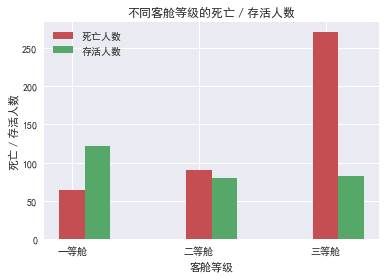

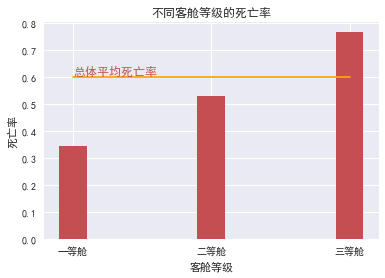

死亡率
Pclass
1    0.345946
2    0.529412
3    0.767045
dtype: float64

与平均死亡率的差距
Pclass
1   -0.254054
2   -0.070588
3    0.167045
dtype: float64


In [11]:
# 探索问题2 - 不同客舱等级的死亡率各是多少？
print
print '探索问题2 - 不同客舱等级的死亡率各是多少？'

# 开始绘图 - 不同客舱等级的死亡／存活人数
plt.figure()

# y - 不同客舱等级的死亡／存活人数
y1 = dataFrame_titanic[dataFrame_titanic['NotSurvived'] == True].groupby('Pclass').sum()['NotSurvived']
y2 = dataFrame_titanic[dataFrame_titanic['Survived'] == True].groupby('Pclass').sum()['Survived']

# x - 不同客舱等级
x1 = np.array([1,2,3])
x2 = x1 + 0.2

# 绘制柱状图
bar1 = plt.bar(x1,y1,width=0.2,color='r')
bar2 = plt.bar(x2,y2,width=0.2,color='g')

# 添加各个柱形描述
plt.xticks(x1,[u'一等舱',u'二等舱',u'三等舱'])

# 添加图例、x轴描述、y轴描述、标题
plt.legend([bar1,bar2],[u'死亡人数',u'存活人数'])
plt.xlabel(u'客舱等级')
plt.ylabel(u'死亡／存活人数')
plt.title(u'不同客舱等级的死亡／存活人数')

# 显示绘图
plt.show()

# 开始绘图 - 不同客舱等级的死亡率
plt.figure()

# y - 不同客舱等级的死亡率
y3 = y1/(y1+y2)

# x - 不同客舱等级
x3 = x1

# 绘制柱状图
bar1 = plt.bar(x3,y3,width=0.2,color='r')

# 添加各个柱形描述
plt.xticks(x3,[u'一等舱',u'二等舱',u'三等舱'])

# 绘制总体平均死亡率参考线
xBar = x1
yBar = [0.6,0.6,0.6]
plt.plot(xBar,yBar,color='orange')
plt.text(1, 0.61, u'总体平均死亡率', color='r') 

# 添加x轴描述、y轴描述、标题
plt.xlabel(u'客舱等级')
plt.ylabel(u'死亡率')
plt.title(u'不同客舱等级的死亡率')

# 显示绘图
plt.show()

print '死亡率'
print y3
print

print '与平均死亡率的差距'
print y3 - 0.6

#### 回答问题2 - 不同客舱等级的死亡率各是多少？
- 根据以上代码计算结果，数据整理如下表所示

客舱等级|死亡率|与平均死亡率差距
----|----|----
一级|0.35|-0.25
二级|0.53|-0.07
三级|0.77|0.17

- 一级客舱和二级客舱的死亡率都低于平均死亡率
- 越高级的客舱死亡率越低
- 与平均死亡率差距最大的是一级客舱，为 -0.25


探索问题3 - 不同的年龄区间的死亡率各是多少？


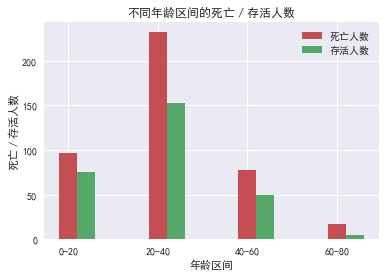

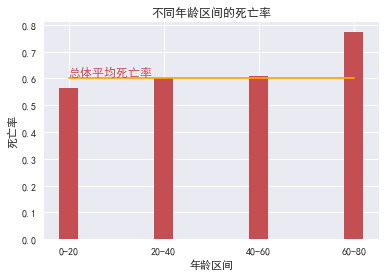

死亡率
AgeRange
1    0.563953
2    0.602597
3    0.609375
4    0.772727
dtype: float64

与平均死亡率的差距
AgeRange
1   -0.036047
2    0.002597
3    0.009375
4    0.172727
dtype: float64


In [13]:
# 探索问题3 - 不同的年龄区间的死亡率各是多少？
print
print '探索问题3 - 不同的年龄区间的死亡率各是多少？'

# 将年龄分组
def ageProcessor(value):
    if(value>0 and value <=20):
        return 1
    if(value>20 and value <=40):
        return 2
    if(value>40 and value <=60):
        return 3
    if(value>60 and value <=80):
        return 4

dataFrame_titanic['AgeRange'] = dataFrame_titanic['Age'].apply(ageProcessor)

# 开始绘图 - 不同年龄区间的死亡／存活人数
plt.figure()

# y - 不同年龄区间的死亡／存活人数
y1 = dataFrame_titanic[dataFrame_titanic['NotSurvived'] == True].groupby('AgeRange').sum()['NotSurvived']
y2 = dataFrame_titanic[dataFrame_titanic['Survived'] == True].groupby('AgeRange').sum()['Survived']

# x - 不同年龄区间
x1 = np.array([0,20,40,60])
x2 = x1 + 4

# 绘制柱状图
bar1 = plt.bar(x1,y1,width=4,color='r')
bar2 = plt.bar(x2,y2,width=4,color='g')

# 添加各个柱形描述
plt.xticks(x1,['0-20','20-40','40-60','60-80'])

# 添加图例、x轴描述、y轴描述、标题
plt.legend([bar1,bar2],[u'死亡人数',u'存活人数'])
plt.xlabel(u'年龄区间')
plt.ylabel(u'死亡／存活人数')
plt.title(u'不同年龄区间的死亡／存活人数')

# 显示绘图
plt.show()

# 开始绘图 - 不同年龄区间的死亡率
plt.figure()

# y - 不同年龄区间的死亡率
y3 = y1/(y1+y2)

# x - 不同年龄区间
x3 = x1

# 绘制柱状图
bar1 = plt.bar(x3,y3,width=4,color='r')

# 添加各个柱形描述
plt.xticks(x3,['0-20','20-40','40-60','60-80'])

# 绘制总体平均死亡率参考线
xBar = x1
yBar = [0.6,0.6,0.6,0.6]
plt.plot(xBar,yBar,color='orange')
plt.text(0, 0.61, u'总体平均死亡率', color='r')

# 添加x轴描述、y轴描述、标题  
plt.xlabel(u'年龄区间')
plt.ylabel(u'死亡率')
plt.title(u'不同年龄区间的死亡率')

# 显示绘图
plt.show()

print '死亡率'
print y3
print

print '与平均死亡率的差距'
print y3 - 0.6

#### 回答问题3 - 不同的年龄区间的死亡率各是多少？
- 根据以上代码计算结果，数据整理如下表所示

年龄区间|死亡率|与平均死亡率差距
----|----|----
0-20|0.56|-0.04
20-40|0.60|0
40-60|0.60|0.01
60-80|0.77|0.17

- 年龄小于60岁的死亡率与平均死亡率相比没有明显差异，年龄大于60岁的死亡率较高
- 60-80岁乘客死亡率与平均死亡率差距最大

- 关于年龄与死亡率的相关关系分析，有可能因为分组不够细而忽略部分年龄和死亡率有关的情况，例如年龄特别小是否可能导致较高死亡率，需要进一步调整分组再做观察


探索问题3 - 不同的年龄区间的死亡率各是多少？


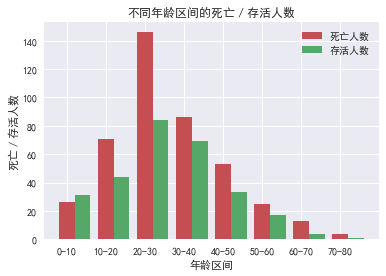

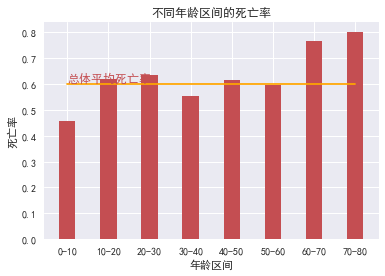

死亡率
AgeRange
1    0.456140
2    0.617391
3    0.634783
4    0.554839
5    0.616279
6    0.595238
7    0.764706
8    0.800000
dtype: float64

与平均死亡率的差距
AgeRange
1   -0.143860
2    0.017391
3    0.034783
4   -0.045161
5    0.016279
6   -0.004762
7    0.164706
8    0.200000
dtype: float64


In [15]:
# 探索问题3（分组细化版） - 不同的年龄区间的死亡率各是多少？
print
print '探索问题3 - 不同的年龄区间的死亡率各是多少？'

# 将年龄分组
def ageProcessor(value):
    if(value>0 and value <=10):
        return 1
    if(value>10 and value <=20):
        return 2
    if(value>20 and value <=30):
        return 3
    if(value>30 and value <=40):
        return 4
    if(value>40 and value <=50):
        return 5
    if(value>50 and value <=60):
        return 6
    if(value>60 and value <=70):
        return 7
    if(value>70 and value <=80):
        return 8

dataFrame_titanic['AgeRange'] = dataFrame_titanic['Age'].apply(ageProcessor)

# 开始绘图 - 不同年龄区间的死亡／存活人数
plt.figure()

# y - 不同年龄区间的死亡／存活人数
y1 = dataFrame_titanic[dataFrame_titanic['NotSurvived'] == True].groupby('AgeRange').sum()['NotSurvived']
y2 = dataFrame_titanic[dataFrame_titanic['Survived'] == True].groupby('AgeRange').sum()['Survived']

# x - 不同年龄区间
x1 = np.array([0,10,20,30,40,50,60,70])
x2 = x1 + 4

# 绘制柱状图
bar1 = plt.bar(x1,y1,width=4,color='r')
bar2 = plt.bar(x2,y2,width=4,color='g')

# 添加各个柱形描述
plt.xticks(x1,['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])

# 添加图例、x轴描述、y轴描述、标题
plt.legend([bar1,bar2],[u'死亡人数',u'存活人数'])
plt.xlabel(u'年龄区间')
plt.ylabel(u'死亡／存活人数')
plt.title(u'不同年龄区间的死亡／存活人数')

# 显示绘图
plt.show()

# 开始绘图 - 不同年龄区间的死亡率
plt.figure()

# y - 不同年龄区间的死亡率
y3 = y1/(y1+y2)

# x - 不同年龄区间
x3 = x1

# 绘制柱状图
bar1 = plt.bar(x3,y3,width=4,color='r')

# 添加各个柱形描述
plt.xticks(x3,['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])

# 绘制总体平均死亡率参考线
xBar = x1
yBar = [0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6]
plt.plot(xBar,yBar,color='orange')
plt.text(0, 0.61, u'总体平均死亡率', color='r')

# 添加x轴描述、y轴描述、标题  
plt.xlabel(u'年龄区间')
plt.ylabel(u'死亡率')
plt.title(u'不同年龄区间的死亡率')

# 显示绘图
plt.show()

print '死亡率'
print y3
print

print '与平均死亡率的差距'
print y3 - 0.6

#### 再次回答问题3 - 不同的年龄区间的死亡率各是多少？
- 根据以上代码计算结果，数据整理如下表所示

年龄区间|死亡率|与平均死亡率差距
----|----|----
0-10|0.46|-0.14
10-20|0.62|0.02
20-30|0.63|0.03
30-40|0.55|-0.05
40-50|0.62|0.02
50-60|0.60|0.00
60-70|0.76|0.16
70-80|0.80|0.2

- 经过对分组进一步细化，发现上一次未观察到的情况（小于10岁的死亡率较低）

- 年龄大于10岁、小于60岁的乘客死亡率与平均死亡率相比没有明显差异
- 年龄大于60岁的死亡率较高
- 年龄小于10岁的死亡率较低
- 70-80岁乘客死亡率与平均死亡率差距最大


探索问题4 - 不同性别的死亡率各是多少？


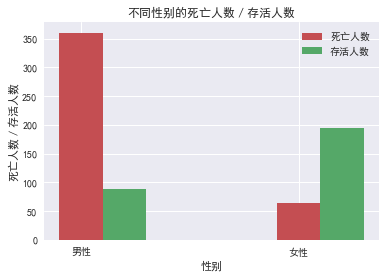

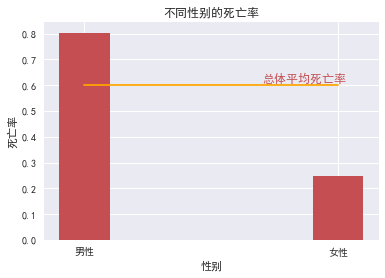

死亡率
SexEnum
1    0.803571
2    0.247104
dtype: float64

与平均死亡率的差距
SexEnum
1    0.203571
2   -0.352896
dtype: float64


In [189]:
# 探索问题4 - 不同性别的死亡率各是多少？
print
print '探索问题4 - 不同性别的死亡率各是多少？'

# 性别数字化用以绘图
def sexProcessor(value):
    if(value == 'male'):
        return 1
    if(value == 'female'):
        return 2

dataFrame_titanic['SexEnum'] = dataFrame_titanic['Sex'].apply(sexProcessor)

# 开始绘图 - 不同性别的死亡人数／存活人数
plt.figure()

# y - 不同性别的死亡／存活人数
y1 = dataFrame_titanic[dataFrame_titanic['NotSurvived'] == True].groupby('SexEnum').sum()['NotSurvived']
y2 = dataFrame_titanic[dataFrame_titanic['Survived'] == True].groupby('SexEnum').sum()['Survived']

# x - 不同性别
x1 = np.array([1,2])
x2 = x1 + 0.2

# 绘制柱状图
bar1 = plt.bar(x1,y1,width=0.2,color='r')
bar2 = plt.bar(x2,y2,width=0.2,color='g')
plt.xticks(x1,[u'男性',u'女性'])

# 添加图例、x轴描述、y轴描述、标题
plt.legend([bar1,bar2],[u'死亡人数',u'存活人数'])
plt.xlabel(u'性别')
plt.ylabel(u'死亡人数／存活人数')
plt.title(u'不同性别的死亡人数／存活人数')

# 显示绘图
plt.show()

# 开始绘图 - 不同性别的死亡率
plt.figure()

# y - 不同性别的死亡率
y3 = y1/(y1+y2)

# x - 不同性别
x3 = x1

# 绘制柱状图
bar1 = plt.bar(x3,y3,width=0.2,color='r')
plt.xticks(x3,[u'男性',u'女性'])

# 绘制总体平均死亡率参考线
xBar = x1
yBar = [0.6,0.6]
plt.plot(xBar,yBar,color='orange')
plt.text(1.7, 0.61, u'总体平均死亡率', color='r')  

# 添加x轴描述、y轴描述、标题  
plt.xlabel(u'性别')
plt.ylabel(u'死亡率')
plt.title(u'不同性别的死亡率')

# 显示绘图
plt.show()

print '死亡率'
print y3
print

print '与平均死亡率的差距'
print y3 - 0.6

#### 回答问题4 - 不同性别的死亡率各是多少？
- 根据以上代码计算结果，数据整理如下表所示

性别|死亡率|与平均死亡率差距
----|----|----
男|0.80|0.20
女|0.24|-0.35

- 男性的死亡率远比女性高
- 女性的死亡率相对来说在一个很低的水平，与平均死亡率的差距相对较大


探索问题5 - 不同父母子女数的死亡率各是多？
Parch
0    335.0
1     49.0
2     29.0
3      2.0
4      4.0
5      4.0
6      1.0
Name: NotSurvived, dtype: float64 Parch
0    186
1     56
2     37
3      3
5      1
Name: Survived, dtype: int64


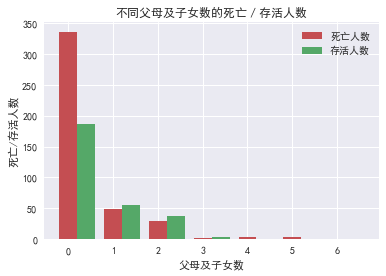

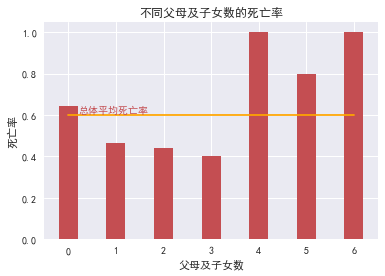

死亡率
Parch
0    0.642994
1    0.466667
2    0.439394
3    0.400000
4    1.000000
5    0.800000
6    1.000000
dtype: float64

与平均死亡率的差距
Parch
0    0.042994
1   -0.133333
2   -0.160606
3   -0.200000
4    0.400000
5    0.200000
6    0.400000
dtype: float64


In [9]:
# 探索问题5 - 不同父母子女数的死亡率各是多？
print
print '探索问题5 - 不同父母子女数的死亡率各是多？'

# 开始绘图 - 不同父母及子女数的死亡／存活人数
plt.figure()

# y - 不同父母及子女数的死亡／存活人数
y1 = dataFrame_titanic[dataFrame_titanic['Survived'] == False].groupby('Parch').sum()['NotSurvived']
y2 = dataFrame_titanic[dataFrame_titanic['Survived'] == True].groupby('Parch').sum()['Survived']

# 检查 y 的内容，将缺失的值补为 0
print y1,y2
y2[4]=0
y2[6]=0

# x - 不同父母及子女数
x1 = np.array([0,1,2,3,4,5,6])
x2 = x1 + 0.4

# 绘制柱状图
bar1 = plt.bar(x1,y1,width=0.4,color='r')
bar2 = plt.bar(x2,y2,width=0.4,color='g')

# 添加图例、x轴描述、y轴描述、标题
plt.legend([bar1,bar2],[u'死亡人数',u'存活人数'])
plt.xlabel(u'父母及子女数')
plt.ylabel(u'死亡/存活人数')
plt.title(u'不同父母及子女数的死亡／存活人数')

# 显示绘图
plt.show()

# 开始绘图 - 不同父母及子女数的死亡率
plt.figure()

# y - 不同父母及子女数的死亡率
y3 = y1/(y1+y2)

# x - 不同父母及子女数
x3 = x1

# 绘制柱状图
bar1 = plt.bar(x3,y3,width=0.4,color='r')

# 绘制总体平均死亡率参考线
xBar = [0,1,2,3,4,5,6]
yBar = [0.6,0.6,0.6,0.6,0.6,0.6,0.6]
plt.plot(xBar,yBar,color='orange')
plt.text(0.2, 0.61, u'总体平均死亡率', color='r')  

# 添加x轴描述、y轴描述、标题  
plt.xlabel(u'父母及子女数')
plt.ylabel(u'死亡率')
plt.title(u'不同父母及子女数的死亡率')

# 显示绘图
plt.show()

print '死亡率'
print y3
print

print '与平均死亡率的差距'
print y3 - 0.6

#### 回答问题5 - 不同父母子女数的死亡率各是多少
- 根据以上代码计算结果，数据整理如下表所示

父母子女数|死亡率|与平均死亡率差距
----|----|----
0|0.64|0.04
1|0.47|-0.13
2|0.43|-0.16
3|0.40|-0.20
4|1.00|0.40
5|0.80|0.20
6|1.00|0.40

- 父母子女数为0的与平均死亡率相比没有明显差异
- 父母子女数在1-3个的死亡率较低，而父母子女数超过3个的则死亡率较高
- 父母子女数在4/6个的乘客死亡率与平均死亡率差距最大，且死亡率高达100%

- 关于父母子女数与死亡率的相关关系分析，也有可能因为样本数量太少（例如父母子女数为3、4、5、6的乘客均不到10人）而导致结果有较大误差


探索问题6 - 不同兄弟姐妹配偶数的死亡率各是多少？
SibSp
0    296.0
1     86.0
2     14.0
3      8.0
4     15.0
5      5.0
Name: NotSurvived, dtype: float64 SibSp
0    173
1     94
2      9
3      4
4      3
Name: Survived, dtype: int64


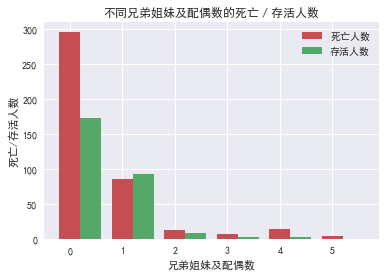

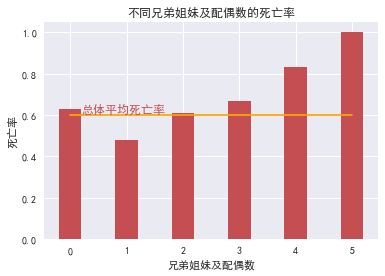

死亡率
SibSp
0    0.631130
1    0.477778
2    0.608696
3    0.666667
4    0.833333
5    1.000000
dtype: float64

与平均死亡率的差距
SibSp
0    0.031130
1   -0.122222
2    0.008696
3    0.066667
4    0.233333
5    0.400000
dtype: float64


In [191]:
# 探索问题6 - 不同兄弟姐妹配偶数的死亡率各是多少？
print
print '探索问题6 - 不同兄弟姐妹配偶数的死亡率各是多少？'

# 开始绘图 - 不同兄弟姐妹配偶数的死亡／存活人数
plt.figure()

# y - 不同兄弟姐妹配偶数的死亡／存活人数
y1 = dataFrame_titanic[dataFrame_titanic['Survived'] == False].groupby('SibSp').sum()['NotSurvived']
y2 = dataFrame_titanic[dataFrame_titanic['Survived'] == True].groupby('SibSp').sum()['Survived']

# 检查 y 的内容，将缺失的值补为 0
print y1,y2
y2[5]=0

# x - 不同兄弟姐妹配偶数
x1 = np.array([0,1,2,3,4,5])
x2 = x1 + 0.4

# 绘制柱状图
bar1 = plt.bar(x1,y1,width=0.4,color='r')
bar2 = plt.bar(x2,y2,width=0.4,color='g')

# 添加图例、x轴描述、y轴描述、标题
plt.legend([bar1,bar2],[u'死亡人数',u'存活人数'])
plt.xlabel(u'兄弟姐妹及配偶数')
plt.ylabel(u'死亡/存活人数')
plt.title(u'不同兄弟姐妹及配偶数的死亡／存活人数')

# 显示绘图
plt.show()

# 开始绘图 - 不同兄弟姐妹配偶数的死亡率
plt.figure()

# y - 不同兄弟姐妹配偶数的死亡率
y3 = y1/(y1+y2)

# x - 不同兄弟姐妹配偶数
x3 = x1

# 绘制柱状图
bar1 = plt.bar(x3,y3,width=0.4,color='r')

# 绘制总体平均死亡率参考线
xBar = [0,1,2,3,4,5]
yBar = [0.6,0.6,0.6,0.6,0.6,0.6]
plt.plot(xBar,yBar,color='orange')
plt.text(0.2,0.61,u'总体平均死亡率',color='r')

# 添加x轴描述、y轴描述、标题  
plt.xlabel(u'兄弟姐妹及配偶数')
plt.ylabel(u'死亡率')
plt.title(u'不同兄弟姐妹及配偶数的死亡率')

# 显示绘图
plt.show()

print '死亡率'
print y3
print

print '与平均死亡率的差距'
print y3 - 0.6

#### 回答问题6 - 不同兄弟姐妹配偶数的死亡率各是多少？
- 根据以上代码计算结果，数据整理如下表所示

兄弟姐妹配偶数|死亡率|与平均死亡率差距
----|----|----
0|0.63|0.03
1|0.48|-0.12
2|0.61|0.01
3|0.67|0.07
4|0.83|0.23
5|1.00|0.40

- 兄弟姐妹配偶数为0的与平均死亡率相比没有明显差异
- 兄弟姐妹配偶数不为0的情况下，随着兄弟姐妹配偶数增多，死亡率逐渐升高
- 兄弟姐妹配偶数在5个的乘客死亡率与平均死亡率差距最大，且死亡率高达100%

- 关于兄弟姐妹配偶数与死亡率的相关关系分析，也有可能因为样本数量太少（例如兄弟姐妹配偶数为2、3、4、5的乘客均不到20人）而导致结果有较大误差

#### 回答问题7 - 客舱等级、年龄、性别、父母子女数、兄弟姐妹配偶数这五个变量和死亡率的相关程度如何？怎样的变量最有可能显著影响死亡率？
- 根据对前面问题的数据整理，各变量中与平均死亡率差距最大的五种情况如下

变量|变量值|死亡率|与平均死亡率差距
----|----|----|----
客舱等级|一等|0.35|-0.25
年龄|60-80|0.77|0.17
性别|女|0.24|0.35
父母子女数|4/6|1.00|0.40
兄弟姐妹配偶数|5|1.00|0.40

- 其中父母子女数和兄弟姐妹配偶数较多的情况下最有可能显著影响死亡率，如上表的情况下，死亡率均高达100%

#### 小结
- 选择的五个变量经过分析，发现均和死亡率有一定的相关性
- 与平均死亡率相比，死亡率较低的乘客主要是女性、小孩、一等舱乘客，死亡率较高的是三等舱乘客、老年人、父母子女数／兄弟姐妹配偶数较多（超过3个）的乘客
- 死亡率最高的是拥有较多父母子女／兄弟姐妹配偶的乘客
- 以上结论是基于泰坦尼克号八百多个乘客数据的分析结果，实际上乘客总数并不只八百多个，可能存在抽样误差而导致结论上的偏差